**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 1: Data Preparation*

# Identification

Name: Raj Badial<br/>
Student Number: 300173931

# Exploratory Analysis

## Import important libraries

In [2]:
# Your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

## Read Dataset

As outlined in the project description, it should be possible for the correctors to ecute your notebook without requiring any downloads.

To facilitate access to the dataset without the need for downloads, use the data ovided in the public GitHub repository and provide a link to the raw version of the taset.

The link to the raw version is as follows:

*https://raw.githubusercontent.com/GITHUB_USERNAME/REPOSITORY_NAME/main/DATASETNAME.v*

For example:

[https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv]ttps://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv)

Now provide the link to YOUR dataset and read the dataset:

In [3]:
url1 = 'https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a1/01/glass.csv'
url2 = 'https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a1/02/dermatology_database_1.csv'
url3 = 'https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a1/03/Maternal%20Health%20Risk%20Data%20Set.csv'
url5 = 'https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a1/05/WineQT.csv'
url6 = 'https://github.com/turcotte/csi4106-f24/raw/refs/heads/main/assignments-data/a1/06/16P.csv'
url7 = 'https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a1/07/train.csv'

dataset1 = pd.read_csv(url1)
dataset2 = pd.read_csv(url2)
dataset3 = pd.read_csv(url3)
# For URL 4, where the column headers are separated
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class values']
dataset4 = pd.read_csv('https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a1/04/car.data', header=None)
# Assign the correct column headers to dataset4
dataset4.columns = columns
dataset5 = pd.read_csv(url5)
dataset6 = pd.read_csv(url6, encoding='ISO-8859-1')
dataset7 = pd.read_csv(url7)

C:\Users\Rajvir\AppData\Local\Temp\ipykernel_29200\4179872574.py:18: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset7 = pd.read_csv(url7)


## Guidelines

The following are the questions for Assignment 1. Under each question, we have provided an initial code cell. You are encouraged to add additional code cells to maintain logical separation of your code. For instance, place the definition of a function in one cell and its execution in a subsequent cell. This approach will help preserve clarity and enhance readability by avoiding the inclusion of excessive code within a single cell.

1. **Analysis of Missing Values**: Examine the datasets to identify and assess ssing values in various attributes. Missing values may be represented by symbols ch as '?', empty strings, or other placeholders.

    1.1 In the list of options, what are the datasets that contain missing values? ecifically, which attribute or attributes has missing values?

    1.2 Describe the methodology used for this investigation, and provide the rresponding code.

    1.1 Data imputation involves replacing missing or incomplete data with substituted values to preserve the dataset's integrity for subsequent analysis. Propose imputation strategies for each attribute with missing values.

In [4]:
# This will display all the unique values in each column of the dataset specified. Here I'm using dataset1 as an example but it works for any of them
for column in dataset1.columns:
    print(f"Unique values in '{column}':")
    print(dataset1[column].unique())
    print("\n")

# Describe method gives statistics for each column to better understand the variance between values and helps identify incorrect types and outliers
print(dataset1.describe(include='all'))
# isnull().sum() lists how many missing values are present within each column of the dataset
print(dataset1.isnull().sum())

''' 
The only datasets with missing values were dataset 2 (A few missing in the Age column), and many in dataset 7 
(Name, Monthly_Inhand_Salary, Type_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_History_Age, Amount_invested_monthly and Monthly_Balance)

For dataset 2, I would have converted all of the ages to integers, taken the mean and replaced the missing ages with the mean of all ages.

For dataset 7, I performed many operations to 'cleanse' the data. 
This is not for all but this represents much of the work I'd done to remove all missing values, as well as adjusting the outliers within the Age column:

# Step 1: Remove '-' and '_' from values in the columns
df['Age'] = df['Age'].str.replace('-', '').str.replace('_', '')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('-', '').str.replace('_', '')
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace('-', '').str.replace('_', '')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('-', '').str.replace('_', '')

# Step 2: Convert the cleaned columns to integers and calculate averages
df['Age'] = df['Age'].astype(int)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)
invested_mean = df['Amount_invested_monthly'].mean()
balance_mean = df['Monthly_Balance'].mean()
mean_numpayments = df['Num_of_Delayed_Payment'].mean()
monthly_inhand_mean = df['Monthly_Inhand_Salary'].mean()
num_credit_mean = df['Num_Credit_Inquiries'].mean()
credit_age_mode = df['Credit_History_Age'].mode()[0]

# Adjust the columns as needed
df = df[(df['Age'] >= 16) & (df['Age'] <= 120)]
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(mean_numpayments)
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(balance_mean)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(invested_mean)
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('Not Specified')
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(monthly_inhand_mean)
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(credit_age_mode)
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(num_credit_mean)

# Create a mapping of Customer_ID to Name (excluding rows where Name is missing)
customer_name_mapping = df.groupby('Customer_ID')['Name'].first().to_dict()

# Use the mapping to fill missing names based on Customer_ID
df['Name'] = df['Name'].fillna(df['Customer_ID'].map(customer_name_mapping))

Doing these operations removes nearly all missing values, other than 5 in the Name column

'''

Unique values in 'Id':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214]


Unique values in 'RI':
[1.52101 1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918
 1.51755 1

" \nThe only datasets with missing values were dataset 2 (A few missing in the Age column), and many in dataset 7 \n(Name, Monthly_Inhand_Salary, Type_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_History_Age, Amount_invested_monthly and Monthly_Balance)\n\nFor dataset 2, I would have converted all of the ages to integers, taken the mean and replaced the missing ages with the mean of all ages.\n\nFor dataset 7, I performed many operations to 'cleanse' the data. \nThis is not for all but this represents much of the work I'd done to remove all missing values, as well as adjusting the outliers within the Age column:\n\n# Step 1: Remove '-' and '_' from values in the columns\ndf['Age'] = df['Age'].str.replace('-', '').str.replace('_', '')\ndf['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('-', '').str.replace('_', '')\ndf['Monthly_Balance'] = df['Monthly_Balance'].str.replace('-', '').str.replace('_', '')\ndf['Amount_invested_monthly'] = df['Amount_inv

2. **Select and familiarize yourself with a classification task:** Choose one of e provided datasets for further investigation. It is advisable to select a dataset ntaining a sufficiently large number of examples, ideally around 1,000, to ensure bust results when applying machine learning algorithms in the subsequent assignment.

    2.1 What is the objective of the task? Is it intended for a specific plication? Do you possess expertise in this particular domain of application?


In [5]:
# I will be using Dataset 5: WineQT.csv for the next sections
# The objective is this task is to accurately classify a wine's quality by using the other values (fixed acidity, volatile acidity,
# citric acid, residual sugar,  chlorides,..., alcohol) to predict such, using ML models.
# The aim is to predict whether a wine is of a low, medium, or high quality, assisting winemakers or consumers in assessing wine quality without the need for human tasting
# I do not possess expertise in this domain

3. **Attribute Analysis**: 

    3.1 Determine which attributes lack informativeness and should be excluded to prove the effectiveness of the machine learning analysis. If all features are emed relevant, explicitly state this conclusion.

    3.2 Examine the distribution of each attribute (column) within the dataset. Utilize histograms or boxplots to visualize the distributions, identifying any underlying patterns or outliers.

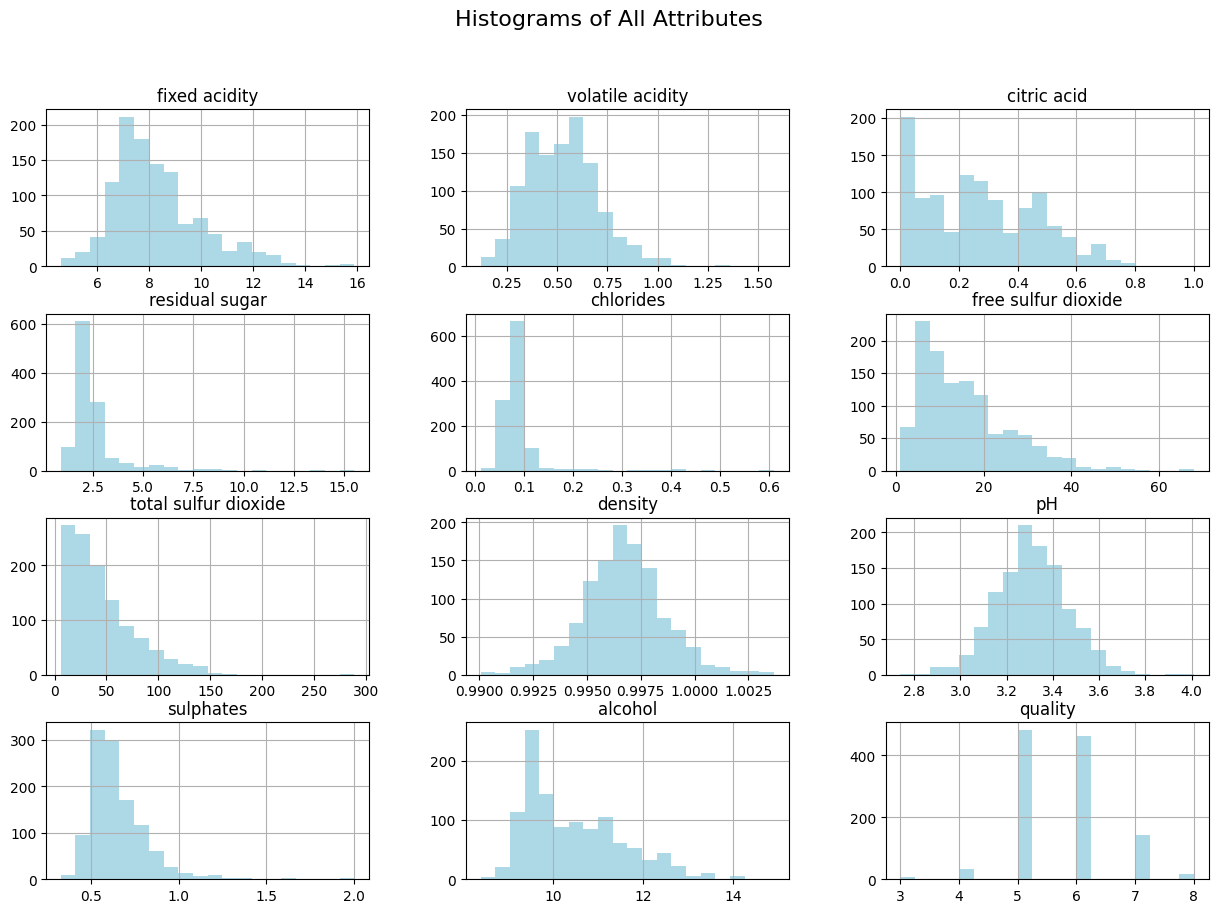

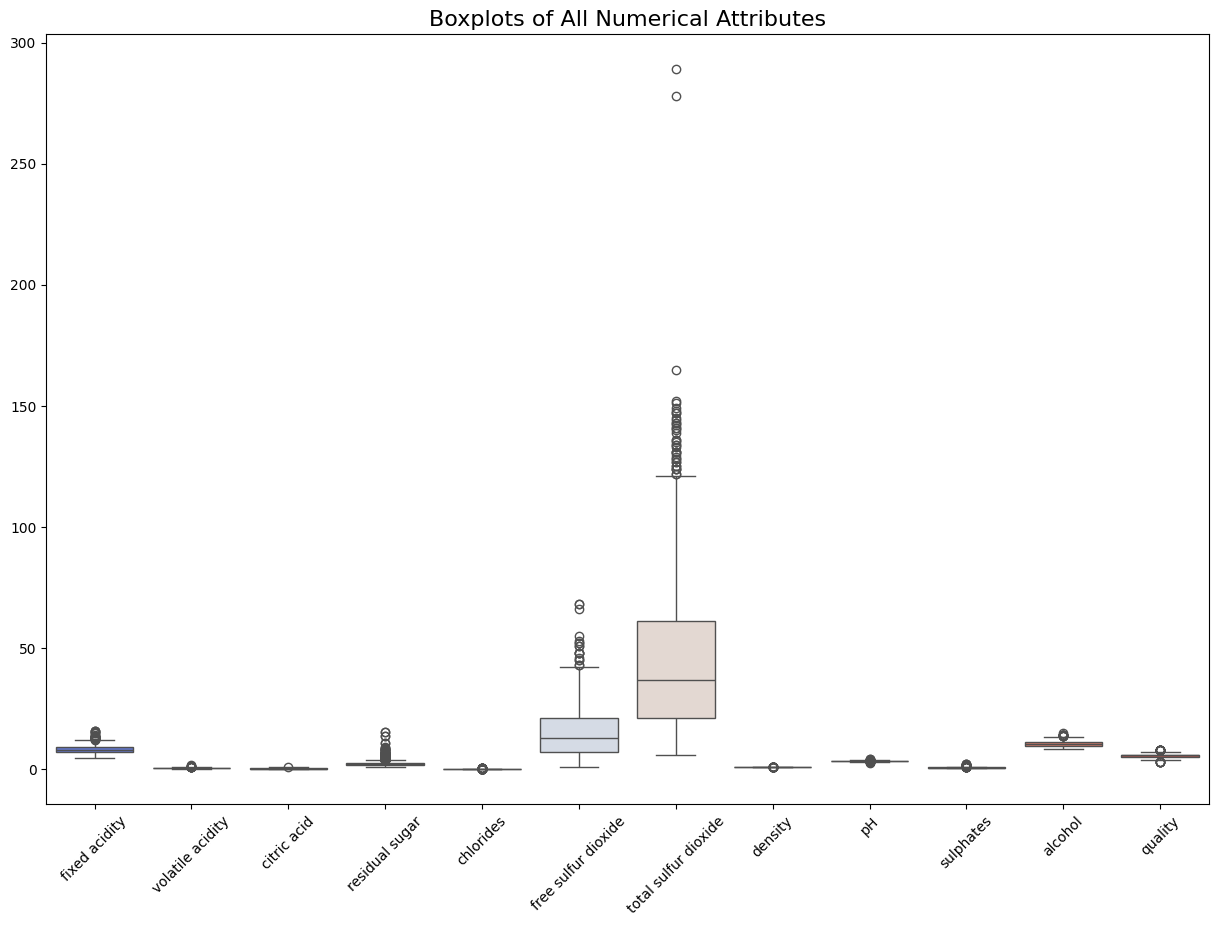

In [6]:
# The only attribute which could be considered irrelevant would be ID, as this does not affect the outcome of the quality of the wine, and is not used in any calculations
# To view the histograms to visualize the distributions, I am using the seaborn library and matplotlib library

# Drop ID column as it messes with the boxplot and is not relevant
dataset5 = dataset5.drop(columns='Id')

# Plot histograms for all attributes
dataset5.hist(figsize=(15, 10), bins=20, color='lightblue')
plt.suptitle("Histograms of All Attributes", fontsize=16)
plt.show()

# Plot boxplots for detecting outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=dataset5, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Boxplots of All Numerical Attributes", fontsize=16)
plt.show()

# Below are the histogram and boxplot of the attributes
# The histogram does a good job at showing variance between the values of the attributes but it does not seem like there are many outliers there. But, when using the boxplot 
# it is very clear to see that total sulfur dioxide has some very large outliers present

![alt text](<Screenshot 2024-09-29 190022.png>)
![alt text](<Screenshot 2024-09-29 190043.png>)


4. **Class Distribution Analysis**: Investigate the distribution of class labels within the dataset. Employ bar plots to visualize the frequency of instances for each class, and assess whether the dataset is balanced or imbalanced.

Class Distribution:
quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


C:\Users\Rajvir\AppData\Local\Temp\ipykernel_29200\3803289315.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


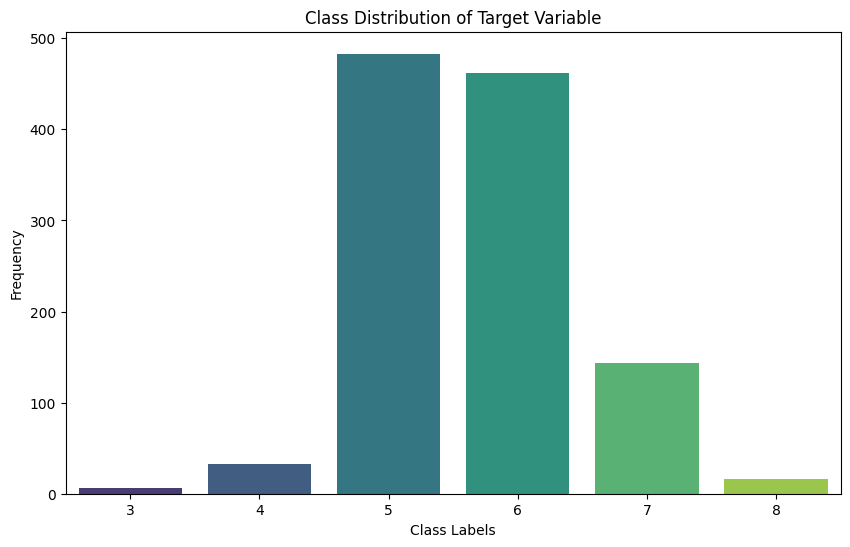


Class Proportions:
quality
5    0.422572
6    0.404199
7    0.125109
4    0.028871
8    0.013998
3    0.005249
Name: proportion, dtype: float64


In [7]:
# Step 1: Identify which column is to be used to determine potential imbalances
target_column = 'quality'

# Step 2: Calculate class distribution using value_counts() function
class_distribution = dataset5[target_column].value_counts()
print("Class Distribution:")
print(class_distribution)

# Step 3: Plot the class distribution using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Class Distribution of Target Variable')
plt.show()

# Step 4: Calculate the proportion of each class for assessment
class_proportion = dataset5[target_column].value_counts(normalize=True)
print("\nClass Proportions:")
print(class_proportion)

![alt text](<Screenshot 2024-09-29 191231.png>)

As you can see here, there is a very clear imbalance. Qualities 5 and 6 account for over 80% of the entire dataset representing a huge over representation over wines of qualities 3, 4, 7 and/or 8. This means that when training the learning model, any new wines will be much more likely to be classified as having a quality of either 5 or 6.

5. **Preprocessing**: 

    5.1 For numerical features, determine the best transformation to use. Indicate e transformation that seems appropriate and why. Include the code illustrating how  apply the transformation. For at least one attribute, show the distribution before d after the transformation. See [Preprocessing data](https://scikit-learn.org/able/modules/preprocessing.html).

    5.2 For categorical features, show how to apply [one-hot encoding](https://ikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).  your dataset does not have categorical data, show how to apply the one-hot encoder  the label (target variable).

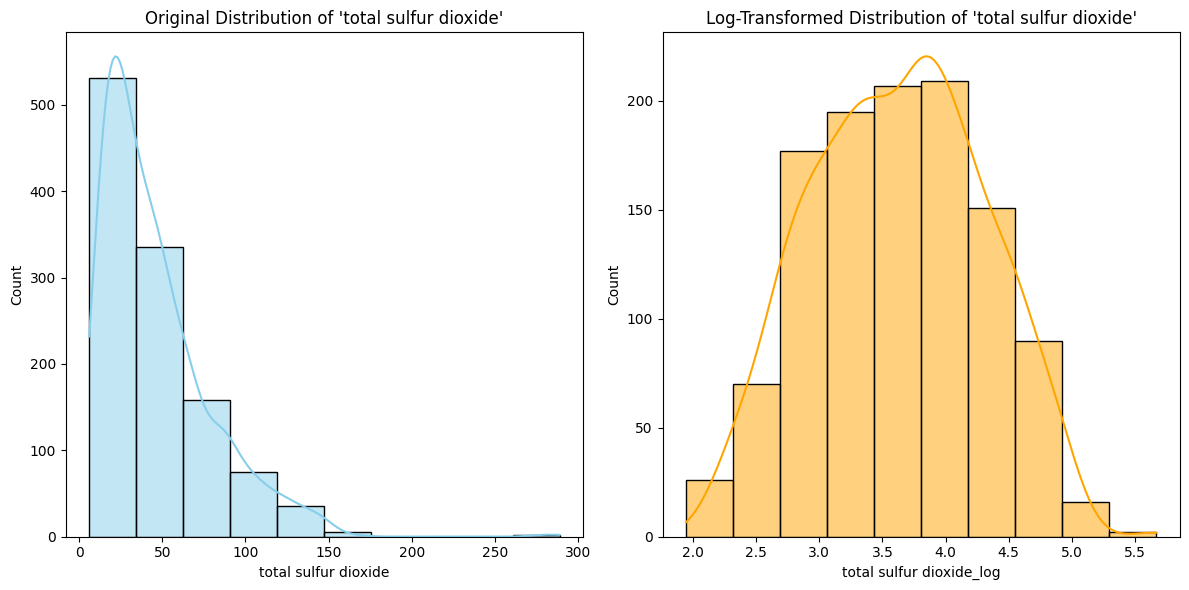

In [9]:
# 5.1 
# For many of the attributes, they tended to have a long right tail, in which a logarithmic transformation seems fitting. However, for some, standardization should be
# used to normalize the data. The attributes which I'd use log for are: fixed acidity, citric acid, residual sugar, free sulfur dioxide, total sulfur dioxide and alcohol. 
# The rest I'd use standardization.

# I'd use StandardScaler from scikit-learn to perform the standardization method.
# I'm using total sulfur dioxide as an example for logarization:

# Step 1: Visualize the original distribution of the 'total sulfur dioxide' attribute
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(dataset5['total sulfur dioxide'], bins=10, kde=True, color='skyblue')
plt.title("Original Distribution of 'total sulfur dioxide'")
plt.xlabel('total sulfur dioxide')

# Step 2: Apply a Log Transformation to reduce skewness
dataset5['total sulfur dioxide_log'] = np.log1p(dataset5['total sulfur dioxide'])  # Using np.log1p to handle log(0) issues

# Step 3: Visualize the transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(dataset5['total sulfur dioxide_log'], bins=10, kde=True, color='orange')
plt.title("Log-Transformed Distribution of 'total sulfur dioxide'")
plt.xlabel('total sulfur dioxide_log')

plt.tight_layout()
plt.show()

![alt text](<Screenshot 2024-09-29 192936.png>)

6. **Training and target data**: Set the Python variable `X` to designate the data and `y` to designate the target class. Make sure to select only the informative features.

In [10]:
# Since the column Id has already been dropped, all other columns are considered relevant and will therefore be assigned to X. 
# The target class will be quality which y is set to.

# Drop 'quality' from the features
X = dataset5.drop(columns=['quality'])

# Target variable is 'quality'
y = dataset5['quality']

7. **Training and test sets**: Split the dataset into training and testing sets. Reserve 20% of data for testing.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print the shapes of the resulting datasets
print("Training Feature Set (X_train) Shape:", X_train.shape)
print("Training Target Set (y_train) Shape:", y_train.shape)
print("Test Feature Set (X_test) Shape:", X_test.shape)
print("Test Target Set (y_test) Shape:", y_test.shape)

Training Feature Set (X_train) Shape: (914, 12)
Training Target Set (y_train) Shape: (914,)
Test Feature Set (X_test) Shape: (229, 12)
Test Target Set (y_test) Shape: (229,)


![alt text](<Screenshot 2024-09-29 193823.png>)

--------------------------------------------------------------------------

# References

Make sure you provide references to ALL sources used (articles, code, algorithms).

https://scikit-learn.org/stable/modules/preprocessing.html

https://www.w3schools.com/python/pandas/pandas_cleaning_wrong_data.asp

https://www.w3schools.com/python/pandas/pandas_cleaning_empty_cells.asp

https://www.w3schools.com/python/pandas/pandas_cleaning_wrong_format.asp

https://stackoverflow.com/questions/50138110/how-to-find-if-there-are-wrong-values-in-a-pandas-dataframe

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html

https://www.tutorialspoint.com/how-to-create-a-histogram-from-pandas-dataframe

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

## AI transcript
**Hint:** To share a link to your colab notebook, click on "share" on the top right. Then, under *General access* , change *Restricted* to "Anyone with the link".